In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
air = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
air.head(4)

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129

In [8]:
air.shape

(144, 1)

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

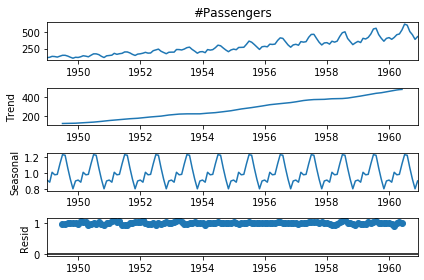

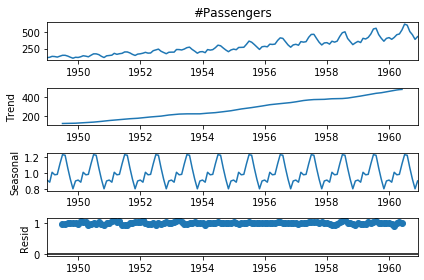

In [9]:
airline = seasonal_decompose(air['#Passengers'], model='multiplicative')
airline.plot()

In [20]:
#Applying SARIMAX to the data as data has seasonality and do not have constant mean and constant stddev
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
train = air.iloc[ :len(air)-12]
test = air.iloc[len(air)-12:]

In [22]:
model = SARIMAX(train["#Passengers"],order = (0,1,1), seasonal_order = (2,1,1,12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.011
Date:                            Mon, 28 Oct 2024   AIC                            896.023
Time:                                    09:31:39   BIC                            909.919
Sample:                                01-01-1949   HQIC                           901.665
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2984      0.080     -3.711      0.000      -0.456      -0.141
ar.S.L12       0.7123      0.226      3.147      0.002       0.269       1.156
ar.S.L24       0.2872      0.100      2.860      0.004       0.090       0.484
ma.S.L12      -0.9845      2.703     -0.364      0.716      -6.283       4.314
sigma2        88.3246    220.030      0.401      0.688    -342.926     519.575
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.86   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

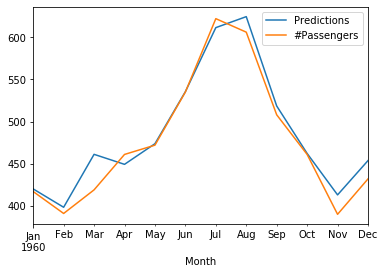

In [23]:
start = len(train)
stop = len(train)+len(test)-1

pred = result.predict(start, stop, typ = 'levels').rename('Predictions')
pred.plot(legend = True)
test['#Passengers'].plot(legend = True)

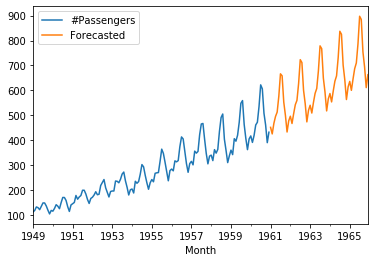

In [26]:
#Forecast next three years
model = SARIMAX(air['#Passengers'], order=(0,1,1), seasonal_order=(2,1,1,12))
result = model.fit()

forecast = result.predict(start=len(air), end = (len(air)-1)+5*12,
                         typ = 'levels').rename('Forecasted')

air['#Passengers'].plot(legend = True)
forecast.plot(legend=True)

In [25]:
air.tail(3)

#Passengers
Month                  
1960-10-01          461
1960-11-01          390
1960-12-01          432